# Orizon: Frequência de Exames Adicionais

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Lendo os dados para a dataframe:

In [3]:
df = pd.read_csv("data_30726034.csv", encoding = "ISO-8859-1")

In [4]:
df.head()

,'categoria','id_cliente','cliente','id_lote','id_conta','guia_prestador','id_item','id_prestador','prestador','cnpj',...,'tipo_item','desc_tipoalta','servico','descricao_despesa','qtde','valor','origem','cnpj_cpf_codnaoperadora_executante','data','ano_mes'
0,'Seguradora Especializada em Saude','48','BRADESCO SAÃDE','42704626','1135485394','3280780','486879191','46069','CLINICA ORTOPEDICA PAULISTA LTDA','03140417000148',...,odonto e demais Ã¡reas de saÃºde)','PROCEDIMENTO','','30726034','ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - ...,'1.0','400.14','0000282693','0000282693','2016-01-02'
1,'Seguradora Especializada em Saude','48','BRADESCO SAÃDE','42704626','1135485394','3280780','486879192','46069','CLINICA ORTOPEDICA PAULISTA LTDA','03140417000148',...,odonto e demais Ã¡reas de saÃºde)','PROCEDIMENTO','','30726034','ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - ...,'1.0','400.14','0000282693','0000282693','2016-01-02'
2,'Seguradora Especializada em Saude','48','BRADESCO SAÃDE','42704626','1135485394','3280780','486879192','46069','CLINICA ORTOPEDICA PAULISTA LTDA','03140417000148',...,odonto e demais Ã¡reas de saÃºde)','PROCEDIMENTO','','30726034','ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - ...,'1.0','400.14','0000282693','0000282693','2016-01-02'
3,'Seguradora Especializada em Saude','48','BRADESCO SAÃDE','42704626','1135485394','3280780','486879191','46069','CLINICA ORTOPEDICA PAULISTA LTDA','03140417000148',...,odonto e demais Ã¡reas de saÃºde)','PROCEDIMENTO','','30726034','ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - ...,'1.0','400.14','0000282693','0000282693','2016-01-02'
4,'Seguradora Especializada em Saude','48','BRADESCO SAÃDE','42704626','1135485394','3280780','486879191','46069','CLINICA ORTOPEDICA PAULISTA LTDA','03140417000148',...,odonto e demais Ã¡reas de saÃºde)','PROCEDIMENTO','','30726034','ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - ...,'1.0','400.14','0000282693','0000282693','2016-01-02'


In [5]:
df['\'data\''].loc[df['\'servico\''].str.contains(r'^.{4}(?!\d+).*')] = 'Deslocado'
df['\'tipo_item\''].loc[df['\'data\''] == 'Deslocado'] = df['\'desc_tipoalta\''].loc[df['\'data\''] == 'Deslocado']
df['\'servico\''].loc[df['\'data\''] == 'Deslocado'] = df['\'descricao_despesa\''].loc[df['\'data\''] == 'Deslocado']
df['\'descricao_despesa\''].loc[df['\'data\''] == 'Deslocado'] = df['\'qtde\''].loc[df['\'data\''] == 'Deslocado']
df['\'qtde\''].loc[df['\'data\''] == 'Deslocado'] = df['\'valor\''].loc[df['\'data\''] == 'Deslocado']
df['\'valor\''].loc[df['\'data\''] == 'Deslocado'] = df['\'origem\''].loc[df['\'data\''] == 'Deslocado']

Selecionando apenas os campos relevantes para esta análise:

In [6]:
selected_df = pd.concat([df["'id_conta'"], df["'servico'"], df["'descricao_despesa'"], df["'tipo_item'"]], axis=1)

Removendo as aspas das labels para facilitar o trabalho:

In [7]:
selected_df.columns = ["id_conta", "servico", "descricao", "tipo_item"]

Vamos trabalhar apenas com os id_conta atrelados à mais de um serviço:

In [8]:
count_df = selected_df.groupby("id_conta").count()

In [9]:
def get_count(acc_id):
    return count_df.lookup([acc_id], ["servico"])[0]

In [10]:
selected_df["count"] = selected_df["id_conta"].map(get_count)

In [11]:
selected_df = selected_df[selected_df["count"] > 1].drop("count", axis=1)

Algumas observações possuem apenas " no campo serviço, vamos filtra-las também:

In [12]:
selected_df = selected_df[selected_df["servico"] != '"']
selected_df = selected_df[selected_df["servico"] != "''"]

In [13]:
selected_df.head()

,id_conta,servico,descricao,tipo_item
19,'1135853444','30726042','Artrotomia - tratamento cirÃºrgico','PROCEDIMENTO'
20,'1135853444','30726239','Realinhamentos do aparelho extensor - tratame...,'PROCEDIMENTO'
21,'1135853444','30726034','Artroplastia total de joelho com implantes - ...,'PROCEDIMENTO'
22,'1135853446','30726042','Artrotomia - tratamento cirÃºrgico','PROCEDIMENTO'
23,'1135853446','30726239','Realinhamentos do aparelho extensor - tratame...,'PROCEDIMENTO'


Montaremos agora nossa tabela principal: ela terá uma coluna para cada serviço disponível no dataset, uma coluna para a porcentagem de id_conta's em que aquele serviço aparece, outra coluna para o tipo de item daquele serviço e outra para sua descrição.

Primeiro, vamos definir uma função para computar a porcentagem dos id_conta em que cada serviço aparece:

In [14]:
unique_acc_ids = len(selected_df["id_conta"].unique())
def get_percentage(service):
    count_num = len(selected_df[selected_df["servico"] == service]["id_conta"].unique())
    return (float(count_num) / unique_acc_ids) * 100.0

In [15]:
count_servico = selected_df[selected_df["servico"] == "'30726034'"]["servico"].value_counts().values
print(count_servico)
print(type(count_servico))
item = selected_df[selected_df["servico"] == "'30726034'"]["tipo_item"].unique()
print(item[0])
print(type(item))
count_servico_item = selected_df[selected_df["tipo_item"] == "'PROCEDIMENTO'"]["tipo_item"].value_counts()
print(count_servico_item.values)
print(type(count_servico_item.values))


a = (float(count_servico) / float(count_servico_item.values)) * 100.0
a

[573]
<class 'numpy.ndarray'>
'PROCEDIMENTO'
<class 'numpy.ndarray'>
[4782]
<class 'numpy.ndarray'>


11.982434127979925

In [16]:
def get_percentage_item(service):
    count_servico = selected_df[selected_df["servico"] == service]["servico"].value_counts().values
    item = selected_df[selected_df["servico"] == service]["tipo_item"].unique()
    count_servico_item = selected_df[selected_df["tipo_item"] == item[0]]["tipo_item"].value_counts()
  
    return (float(count_servico) / float(count_servico_item.values)) * 100.0

Agora, uma função para pegar uma descrição qualquer para cada serviço:

In [17]:
def get_description(service):
    return selected_df[selected_df["servico"] == service]["descricao"].iloc[0]

E uma função para pegar o tipo de item para cada serviço:

In [18]:
def get_item_type(service):
    return selected_df[selected_df["servico"] == service]["tipo_item"].iloc[0]

Agora que todas as funções estão prontas, podemos montar a dataframe:

In [21]:
all_services = selected_df["servico"].unique()
all_tipo_item = selected_df["tipo_item"].unique()
percentages = [get_percentage(service) for service in all_services]
descriptions = [get_description(service) for service in all_services]
item_types = [get_item_type(service) for service in all_services]
percentages_item_types = [round(get_percentage_item(service),2) for service in all_services]

df_dict = {'servico': all_services, '% por conta': percentages, '% por item': percentages_item_types, "descricao": descriptions, "tipo de item": item_types}
final_df = pd.DataFrame(df_dict)

E selecionamos os serviços em que aparecem em mais de 20% dos id_conta para exibição:

In [22]:
final_df[final_df["% por conta"] > 20].sort_values("% por conta", axis=0, ascending=False)

,% por conta,% por item,descricao,servico,tipo de item
2,100.0,11.98,'Artroplastia total de joelho com implantes - ...,'30726034','PROCEDIMENTO'
83,44.0,3.70,'URIA','40302580','PROCEDIMENTO'
80,44.0,4.66,'HEMOGRAMA COM CONTAGEM DE PLAQUETAS OU FRAES ...,'40304361','PROCEDIMENTO'
20,44.0,2.85,'DIPIRONA 1G AMPOLA 2ML','90196031','MEDICAMENTOS'
71,44.0,3.74,'CREATININA','40301630','PROCEDIMENTO'
11,42.0,3.66,'SDIO','40302423','PROCEDIMENTO'
29,42.0,3.62,'POTSSIO','40302318','PROCEDIMENTO'
54,38.0,1.73,'CEFAZOLINA 1G FRASCO','90008332','MEDICAMENTOS'
74,38.0,3.22,'ATENDIMENTO MEDICO DO INTENSIVISTA EM UTI GER...,'10104020','PROCEDIMENTO'
129,36.0,2.47,'Tempo de protrombina - determinacao','40304590','PROCEDIMENTO'


Vamos agora fazer uma analise também dos tipos de item, vendo qual a porcentagem dos id_conta em que cada um deles aparece: 

In [23]:
item_type_dict = {}
for tipo in selected_df["tipo_item"].unique():
    item_type_dict[tipo] = len(selected_df[selected_df["tipo_item"] == tipo]["id_conta"].unique()) * 100 / 50.0

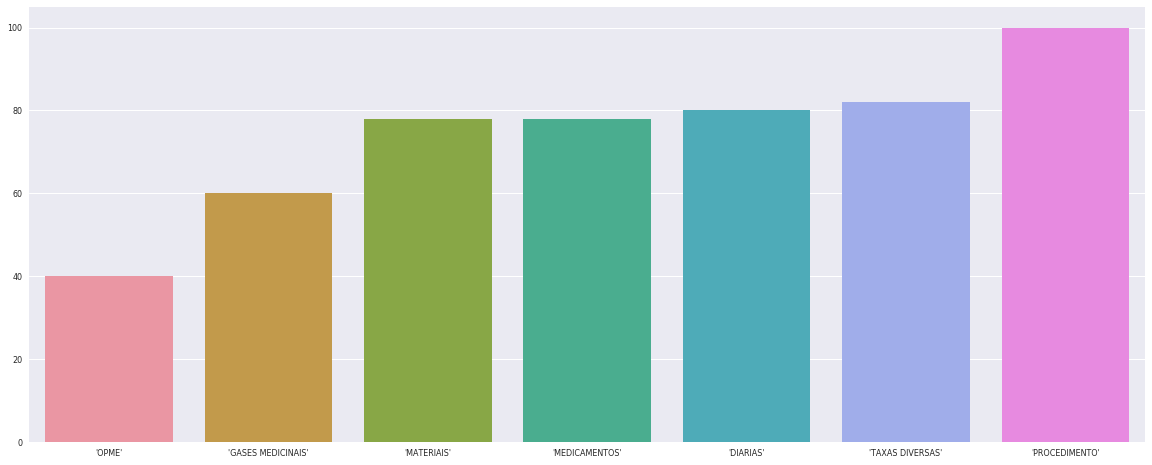

In [24]:
%matplotlib inline 
tup_list = [(key, item_type_dict[key]) for key in item_type_dict.keys()]
sorted_list = sorted(tup_list, key=lambda tup: tup[1])
sb.set(font_scale=0.8)
fig, ax = plt.subplots(1,1)
fig.set_size_inches(20, 8)
sb.barplot(x=[tup[0] for tup in sorted_list], y=[tup[1] for tup in sorted_list],ax=ax)

Gerando uma tabela para cada tipo de item:

In [27]:
for item in final_df["tipo de item"].unique():
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print("-------------" + item + "-------------")
        display(final_df[final_df["tipo de item"] == item].drop("tipo de item", axis=1).sort_values("% por conta", axis=0, ascending=False))
        final_df[final_df["tipo de item"] == item].drop("tipo de item", axis=1).sort_values("% por conta", axis=0, ascending=False).to_csv("../results/" + item + "_dados.csv", index=None)


-------------'PROCEDIMENTO'-------------


,% por conta,% por item,descricao,servico
2,100.0,11.98,'Artroplastia total de joelho com implantes - ...,'30726034'
83,44.0,3.70,'URIA','40302580'
80,44.0,4.66,'HEMOGRAMA COM CONTAGEM DE PLAQUETAS OU FRAES ...,'40304361'
71,44.0,3.74,'CREATININA','40301630'
11,42.0,3.66,'SDIO','40302423'
29,42.0,3.62,'POTSSIO','40302318'
74,38.0,3.22,'ATENDIMENTO MEDICO DO INTENSIVISTA EM UTI GER...,'10104020'
31,36.0,2.34,'MAGNSIO','40302237'
129,36.0,2.47,'Tempo de protrombina - determinacao','40304590'
26,34.0,2.30,'TEMPO DE TROMBOPLASTINA PARCIAL ATIVADA','40304639'


-------------'MATERIAIS'-------------


,% por conta,% por item,descricao,servico
518,30.0,1.75,'SERINGA SEM AG.10ML LUER-LOK PLASTIPAK 990172','70705330'
164,30.0,0.68,'SERINGA SEM AG.05ML LUER-LOK 990175','70705313'
198,30.0,1.59,'AGULHA DESC. 40 X 12 (BD)','70014370'
138,28.0,0.58,'CATETER NASAL OXIGENIO TP.OCULOS 140CM 2807P','0002340147'
186,28.0,1.33,'SERINGA SEM AG.20ML LUER SLIP PLASTIPAK 990173','70705348'
3,24.0,0.43,'FIO CIRURGICO MONONYLON 3.0 1171T','70259496'
140,20.0,0.38,'ELETRODO PARA MONITORIZACAO MICROPORE 2239 50...,'70204241'
630,20.0,0.45,'LAMINA BISTURI NR 11','70360758'
53,18.0,0.33,'LAMINA BISTURI N.15','70360812'
653,16.0,0.35,'AGULHA HIPODERMICA 25X7 PRECISIONGLIDE 300327...,'70014280'


-------------'MEDICAMENTOS'-------------


,% por conta,% por item,descricao,servico
20,44.0,2.85,'DIPIRONA 1G AMPOLA 2ML','90196031'
54,38.0,1.73,'CEFAZOLINA 1G FRASCO','90008332'
209,30.0,0.79,'SORO RINGER LACTATO - 500ML','90019717'
9,30.0,0.75,'DEXAMETASONA 4MG/ML FRASCO 2,'90003551'
59,30.0,1.62,'SORO FISIOLOGICO 0,'90019822'
85,28.0,0.75,'SULFATO DE EFEDRINA 50MG AMP','90045980'
565,26.0,1.62,'CLEXANE 40MG/0,'90194500'
146,26.0,0.68,'NEOCAINA ISOBARICA','90047249'
21,26.0,0.63,'MIDAZOLAM 5MG AMP. 5ML','90184378'
33,26.0,0.74,'MORFINA 0,'90045769'


-------------'TAXAS DIVERSAS'-------------


,% por conta,% por item,descricao,servico
14,34.0,3.23,'TAXA DE SALA DE RECUPERACAO POSANESTESICA','60023180'
156,30.0,13.26,'TAXA DE REFEICAO DE ACOMPANHANTE (ALMOCO OU J...,'60033533'
36,26.0,2.88,'TAXA DE SALA CIRURGICA PORTE 5','60023147'
368,24.0,2.54,'TAXA DE SALA CIRURGICA,'60023155'
392,20.0,2.27,'TAXA DE REGISTRO DE INTERNACAO','60033568'
264,20.0,1.92,'GARROTE PNEUMATICO','60026987'
157,18.0,1.92,'TAXA DE MONITOR / MONITORIZACAO DE OXIMETRO P...,'60031808'
82,16.0,1.37,'TAXA DE BISTURI ELETRICO EM CENTRO CIRURGICO','60025565'
202,14.0,1.58,'BISTURI ELETRICO (CAUTERIO)','60026227'
151,14.0,1.79,'BOMBA DE INFUSAO POR DIA','60025662'


-------------'DIARIAS'-------------


,% por conta,% por item,descricao,servico
183,26.0,12.54,'DIARIA DE UTI ADULTO GERAL','60001038'
73,18.0,11.66,'DIARIA DE APARTAMENTO COMPLETO','60000651'
423,14.0,13.99,'DIARIA DE QUARTO COLETIVO DE 2 LEITOS COM BA...,'60000805'
814,8.0,5.25,'DIARIA DE APARTAMENTO LUXO','60000511'
973,8.0,4.37,'DIARIA DE APARTAMENTO SIMPLES','60000554'
382,4.0,1.75,'DIARIA DE ENFERMARIA DE 3 LEITOS COM BANHEIR...,'60000694'
877,4.0,1.17,'DIARIA DE APARTAMENTO TIPO B','80010660'
845,4.0,3.79,'DIARIA DE ACOMPANHANTE SOMENTE COM CAFE DA MA...,'60000473'
1586,2.0,24.49,'DIARIA COMPACTA DE ENFERMARIA DE 4 OU MAIS LE...,'60000147'
1680,2.0,1.17,'DiÃ¡ria De Apartamento Standard','0060000651'


-------------'GASES MEDICINAIS'-------------


,% por conta,% por item,descricao,servico
449,26.0,42.98,'OXIGENIO POR HORA','60034335'
373,12.0,17.54,'CATETER PARA OXIGENIO,'60028378'
468,6.0,2.63,'NITROGENIO POR HORA','60028521'
254,4.0,1.75,'AR COMPRIMIDO P/HORA','60028343'
868,4.0,3.51,'OXIGENIO SOB CATETER','60004355'
185,2.0,4.39,'NEBULIZACAO/MASCARA COM AR COMPRIMIDO E OXIGE...,'60009063'
1096,2.0,4.39,'OXIGENIO SOB CATETER','86010450'
1859,2.0,2.63,'OXIGENIO NO RESPIRADOR/VENTILADOR VAZAO DE 4 ...,'60010932'
1633,2.0,2.63,'O2 05/L NO C.C.','60011017'
1592,2.0,3.51,'INALACAO COM OXIGENIO,'60028432'


-------------'OPME'-------------


,% por conta,% por item,descricao,servico
380,12.0,7.69,'TAXA DE OPERACIONALIZACAO','60033487'
925,6.0,5.77,'DRENO DE SUCCAO CONTINUA','70199507'
519,4.0,3.85,'PONTA ASPIRACAO ASPLASS-80201','99999999'
791,4.0,2.40,'DRENO PARA SUCCAO CONVENCIONAL ZAMMIVAC 32','5514074'
1482,4.0,2.40,'DRENO SUCCAO RES.400ML 6.4 BIO DREN','0000072449'
1559,2.0,1.92,'Cimento Osseo Osteobond 40g - Zimmer','00067155'
1603,2.0,1.92,'BASE TIBIAL MODULAR III MEDIA REVISAO','09047546'
1594,2.0,1.92,'CAMPO CIRURGICO EST.STERI DRAPE 91X83CM AD.59...,'70856591'
1593,2.0,1.92,'ASPIRADOR CIRURGICO DESCARTAVEL','70033862'
1583,2.0,1.92,'CIMENTO ORTOPEDICO VISCOSIDADE NORMAL','70151873'
